# Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')

C:\Users\SKPARK\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.DataFrame({
    'height': [140, 145, 150, 155, 160, 165, 170, 175, 180, 185],
    'foot_size': [190, 200, 210, 220, 230, 240, 250, 260, 270, 280],
})
df

,height,foot_size
0,140,190
1,145,200
2,150,210
3,155,220
4,160,230
5,165,240
6,170,250
7,175,260
8,180,270
9,185,280


In [3]:
sales_df = pd.DataFrame({
    'advertising_spending': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'sales': [50, 60, 70, 80, 72, 68, 65, 62, 60, 58],
})
sales_df['random_no'] = [999, -99, 999, -99, 999, -99, 999, -99, 999, -99]
sales_df['garbage_no'] = [0, -2, 3, 4, -5, 9999, -3, 2, -1, 9999]

sales_df

,advertising_spending,sales,random_no,garbage_no
0,10,50,999,0
1,20,60,-99,-2
2,30,70,999,3
3,40,80,-99,4
4,50,72,999,-5
5,60,68,-99,9999
6,70,65,999,-3
7,80,62,-99,2
8,90,60,999,-1
9,100,58,-99,9999


## Linear Regression

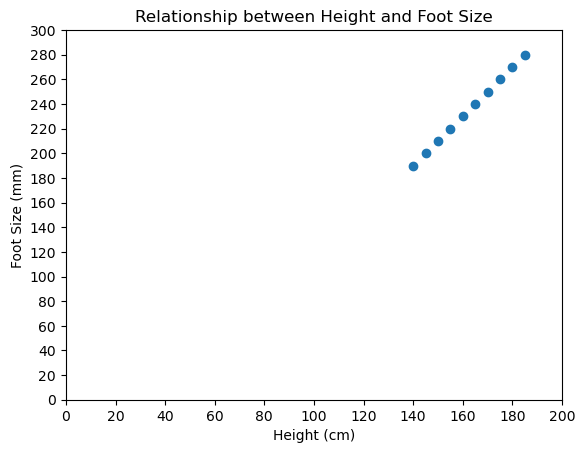

In [4]:
plt.scatter(df['height'], df['foot_size'])
plt.xlabel('Height (cm)')
plt.ylabel('Foot Size (mm)')
plt.xticks(range(0, 201, 20))
plt.yticks(range(0, 301, 20))
plt.title('Relationship between Height and Foot Size')
plt.show()

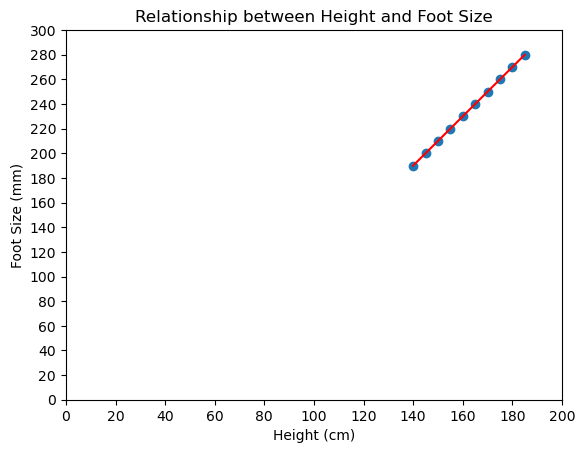

MAE 0.0
MSE 0.0
RMSE 0.0
R2 1.0


In [5]:
from sklearn.linear_model import LinearRegression

# Fitting linear regression model
linear_model = LinearRegression()
linear_model.fit(df[['height']], df['foot_size'])  # predicting foot_size based on height
predicted_foot_size = linear_model.predict(df[['height']])

# Plotting the linear regression line
plt.scatter(df[['height']], df['foot_size'])
plt.plot(df[['height']], predicted_foot_size, color='red')
plt.xlabel('Height (cm)')
plt.ylabel('Foot Size (mm)')
plt.xticks(range(0, 201, 20))
plt.yticks(range(0, 301, 20))
plt.title('Relationship between Height and Foot Size')
plt.show()

print("MAE", np.round(mean_absolute_error(df['foot_size'], predicted_foot_size), 4))
print("MSE", np.round(mean_squared_error(df['foot_size'], predicted_foot_size), 4))
print("RMSE", np.round(mean_squared_error(df['foot_size'], predicted_foot_size, squared=False), 4))
print("R2", np.round(r2_score(df['foot_size'], predicted_foot_size), 4))

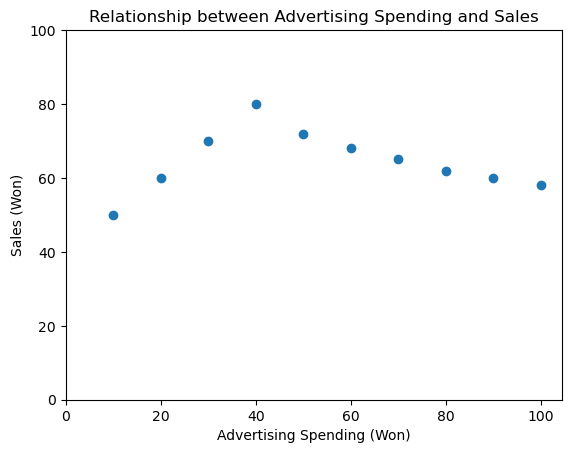

In [6]:
plt.scatter(sales_df['advertising_spending'], sales_df['sales'])
plt.xlabel('Advertising Spending (Won)')
plt.ylabel('Sales (Won)')
plt.xticks(range(0, 101, 20))
plt.yticks(range(0, 101, 20))
plt.title('Relationship between Advertising Spending and Sales')
plt.show()

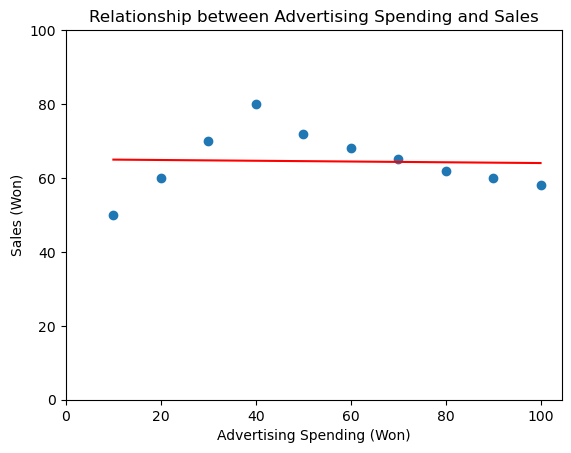

MAE 6.4485
MSE 63.7624
RMSE 7.9851
R2 0.0014


array([-0.01030303])

In [9]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(sales_df[['advertising_spending']], sales_df['sales'])
predicted_sales = linear_model.predict(sales_df[['advertising_spending']])

plt.scatter(sales_df[['advertising_spending']], sales_df['sales'])
plt.plot(sales_df[['advertising_spending']], predicted_sales, color='red')
plt.xlabel('Advertising Spending (Won)')
plt.ylabel('Sales (Won)')
plt.xticks(range(0, 101, 20))
plt.yticks(range(0, 101, 20))
plt.title('Relationship between Advertising Spending and Sales')
plt.show()

print("MAE", np.round(mean_absolute_error(sales_df['sales'], predicted_sales), 4))
print("MSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales), 4))
print("RMSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales, squared=False), 4))
print("R2", np.round(r2_score(sales_df['sales'], predicted_sales), 4))

linear_model.coef_

   advertising_spending
0                    10
1                    20
2                    30
3                    40
4                    50
5                    60
6                    70
7                    80
8                    90
9                   100
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


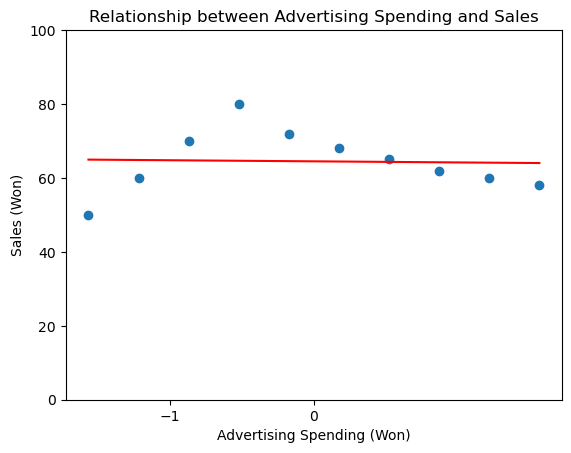

MAE 6.4485
MSE 63.7624
RMSE 7.9851
R2 0.0014


array([-0.29593202])

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(sales_df[['advertising_spending']])
scaled_features = scaler.transform(sales_df[['advertising_spending']])

print(sales_df[['advertising_spending']])
print(scaled_features)

linear_model = LinearRegression()
linear_model.fit(scaled_features, sales_df['sales'])
predicted_sales = linear_model.predict(scaled_features)

plt.scatter(scaled_features, sales_df['sales'])
plt.plot(scaled_features, predicted_sales, color='red')
plt.xlabel('Advertising Spending (Won)')
plt.ylabel('Sales (Won)')
plt.xticks(range(-1, 1))
plt.yticks(range(0, 101, 20))
plt.title('Relationship between Advertising Spending and Sales')
plt.show()

print("MAE", np.round(mean_absolute_error(sales_df['sales'], predicted_sales), 4))
print("MSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales), 4))
print("RMSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales, squared=False), 4))
print("R2", np.round(r2_score(sales_df['sales'], predicted_sales), 4))

linear_model.coef_

In [12]:
# Using 'random_no' which is useless, to show increased r-squared value

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(sales_df[['random_no', 'advertising_spending']], sales_df['sales'])
predicted_sales = linear_model.predict(sales_df[['random_no', 'advertising_spending']])

print("MAE", np.round(mean_absolute_error(sales_df['sales'], predicted_sales), 4))
print("MSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales), 4))
print("RMSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales, squared=False), 4))
print("R2", np.round(r2_score(sales_df['sales'], predicted_sales), 4))

MAE 6.65
MSE 62.395
RMSE 7.8991
R2 0.0228


In [13]:
# Using 'random_no' and 'garbage_no' which are useless

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(sales_df[['random_no', 'garbage_no', 'advertising_spending']], sales_df['sales'])
predicted_sales = linear_model.predict(sales_df[['random_no', 'garbage_no', 'advertising_spending']])

print("MAE", np.round(mean_absolute_error(sales_df['sales'], predicted_sales), 4))
print("MSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales), 4))
print("RMSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales, squared=False), 4))
print("R2", np.round(r2_score(sales_df['sales'], predicted_sales), 4))

MAE 6.9199
MSE 60.3727
RMSE 7.77
R2 0.0545


## Polynomial Regression

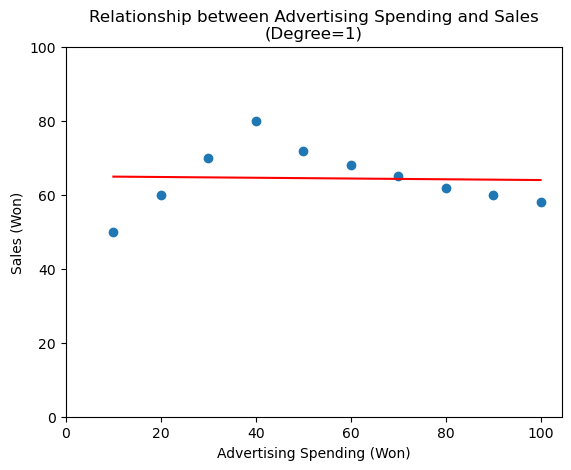

MAE 6.4485
MSE 63.7624
RMSE 7.9851
R2 0.0014


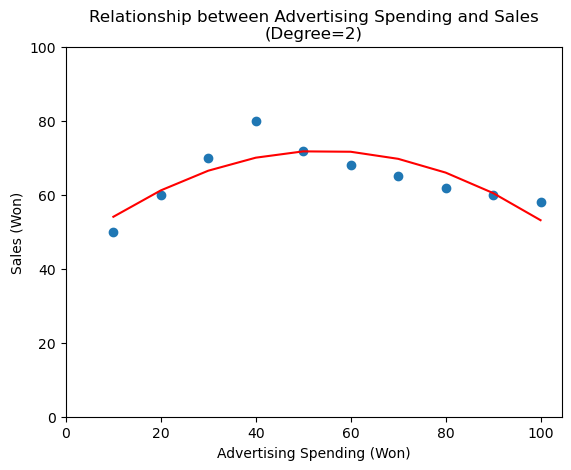

MAE 3.6758
MSE 20.4889
RMSE 4.5265
R2 0.6791


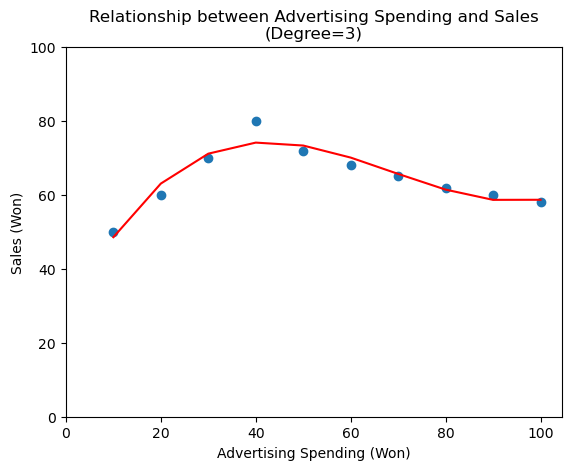

MAE 1.8275
MSE 5.633
RMSE 2.3734
R2 0.9118


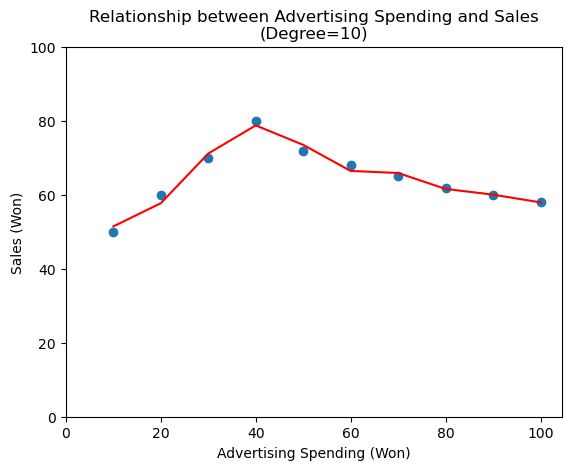

MAE 1.0566
MSE 1.573
RMSE 1.2542
R2 0.9754


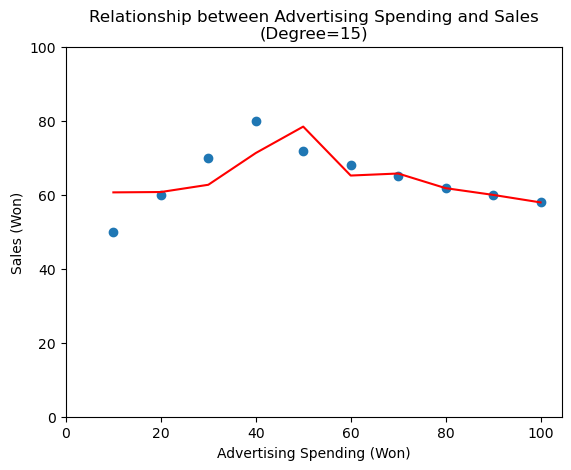

MAE 3.763
MSE 29.2886
RMSE 5.4119
R2 0.5413


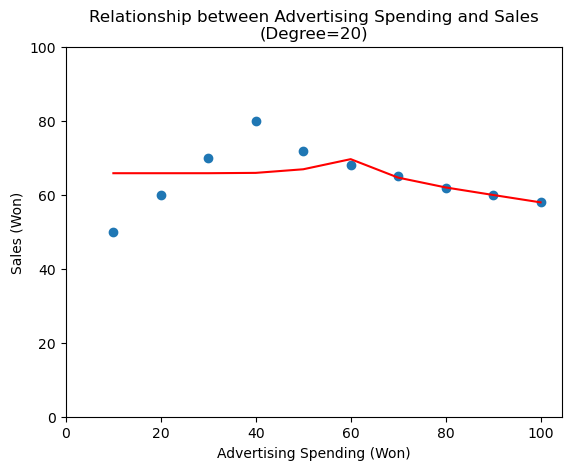

MAE 4.6991
MSE 52.9011
RMSE 7.2733
R2 0.1715


In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 10, 15, 20]

for degree in degrees:

    # Transforming the data to include polynomial features up to degree 1 (quadratic)
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(sales_df[['advertising_spending']])
    
    # Fitting polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, sales_df['sales'])
    predicted_sales = poly_model.predict(X_poly)
    
    # Plotting the polynomial regression line
    plt.scatter(sales_df['advertising_spending'], sales_df['sales'])
    plt.plot(sales_df['advertising_spending'], poly_model.predict(X_poly), color='red')
    plt.xlabel('Advertising Spending (Won)')
    plt.ylabel('Sales (Won)')
    plt.xticks(range(0, 101, 20))
    plt.yticks(range(0, 101, 20))
    plt.title(f'Relationship between Advertising Spending and Sales\n(Degree={degree})')
    plt.show()

    # Calculating MAE, MSE, RMSE, R2
    print("MAE", np.round(mean_absolute_error(sales_df['sales'], predicted_sales), 4))
    print("MSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales), 4))
    print("RMSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales, squared=False), 4))
    print("R2", np.round(r2_score(sales_df['sales'], predicted_sales), 4))


### Polynimial Regression with irrelevant features (before standardization)

In [16]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 10, 15, 20]

for degree in degrees:

    # Transforming the data to include polynomial features up to degree 1 (quadratic)
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(sales_df[['random_no', 'garbage_no', 'advertising_spending']])
    
    # Fitting polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, sales_df['sales'])
    predicted_sales = poly_model.predict(X_poly)
    
    # Calculating MAE, MSE, RMSE, R2
    print(f"Degree: {degree}")
    print("MAE", np.round(mean_absolute_error(sales_df['sales'], predicted_sales), 4))
    print("MSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales), 4))
    print("RMSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales, squared=False), 4))
    print("R2", np.round(r2_score(sales_df['sales'], predicted_sales), 4))
    print("---------------------")


Degree: 1
MAE 6.9199
MSE 60.3727
RMSE 7.77
R2 0.0545
---------------------
Degree: 2
MAE 0.8949
MSE 2.2796
RMSE 1.5098
R2 0.9643
---------------------
Degree: 3
MAE 0.0
MSE 0.0
RMSE 0.0
R2 1.0
---------------------
Degree: 10
MAE 2.5334
MSE 24.2667
RMSE 4.9261
R2 0.6199
---------------------
Degree: 15
MAE 5.8945
MSE 55.3986
RMSE 7.443
R2 0.1324
---------------------
Degree: 20
MAE 5.5
MSE 58.2875
RMSE 7.6346
R2 0.0871
---------------------


### Polynimial Regression with irrelevant features (after standardization)

In [17]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(sales_df[['random_no', 'garbage_no', 'advertising_spending']])
scaled_features = scaler.transform(sales_df[['random_no', 'garbage_no', 'advertising_spending']])

degrees = [1, 2, 3, 10, 15, 20, 100]

for degree in degrees:

    # Transforming the data to include polynomial features up to degree 1 (quadratic)
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(scaled_features)
    
    # Fitting polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, sales_df['sales'])
    predicted_sales = poly_model.predict(X_poly)
    
    # Calculating MAE, MSE, RMSE, R2
    print(f"Degree: {degree}")
    print("MAE", np.round(mean_absolute_error(sales_df['sales'], predicted_sales), 4))
    print("MSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales), 4))
    print("RMSE", np.round(mean_squared_error(sales_df['sales'], predicted_sales, squared=False), 4))
    print("R2", np.round(r2_score(sales_df['sales'], predicted_sales), 4))
    print("---------------------")


Degree: 1
MAE 6.9199
MSE 60.3727
RMSE 7.77
R2 0.0545
---------------------
Degree: 2
MAE 0.8949
MSE 2.2796
RMSE 1.5098
R2 0.9643
---------------------
Degree: 3
MAE 0.0
MSE 0.0
RMSE 0.0
R2 1.0
---------------------
Degree: 10
MAE 0.0
MSE 0.0
RMSE 0.0
R2 1.0
---------------------
Degree: 15
MAE 0.0
MSE 0.0
RMSE 0.0
R2 1.0
---------------------
Degree: 20
MAE 0.0
MSE 0.0
RMSE 0.0
R2 1.0
---------------------
Degree: 100
MAE 4.2
MSE 33.0
RMSE 5.7446
R2 0.4832
---------------------


## Ridge Regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [254]:
score_df = pd.DataFrame({
    'study_hour': [10, 4, 9, 3, 10, 2, 8, 5, 11, 1],
    'height': [150, 155, 160, 165, 170, 175, 180, 185, 190, 195],
    'score': [95, 50, 90, 40, 92, 38, 85, 62, 100, 28],
})

score_df

,study_hour,height,score
0,10,150,95
1,4,155,50
2,9,160,90
3,3,165,40
4,10,170,92
5,2,175,38
6,8,180,85
7,5,185,62
8,11,190,100
9,1,195,28


In [269]:
from sklearn.linear_model import Ridge

alphas = [0.0, 0.1, 0.5, 1.0, 5.0, 10, 100, 500]

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(score_df[['study_hour', 'height']], score_df['score'])
    predicted_score = ridge_model.predict(score_df[['study_hour', 'height']])
    print(f'[alpha {alpha}]\ny = {ridge_model.coef_[0]} x1 + {ridge_model.coef_[1]} x2')

    # Calculating MAE, MSE, RMSE, R2
    print("MAE", np.round(mean_absolute_error(score_df['score'], predicted_score), 4))
    print("MSE", np.round(mean_squared_error(score_df['score'], predicted_score), 4))
    print("RMSE", np.round(mean_squared_error(score_df['score'], predicted_score, squared=False), 4))
    print("R2", np.round(r2_score(score_df['score'], predicted_score), 4))
    print()

[alpha 0.0]
y = 7.3535758323057925 x1 + 0.02292231812577044 x2
MAE 2.3805
MSE 7.2125
RMSE 2.6856
R2 0.9893

[alpha 0.1]
y = 7.347346304084198 x1 + 0.022581430820067996 x2
MAE 2.3828
MSE 7.213
RMSE 2.6857
R2 0.9893

[alpha 0.5]
y = 7.322533675704617 x1 + 0.021223964380401937 x2
MAE 2.3918
MSE 7.2239
RMSE 2.6877
R2 0.9893

[alpha 1.0]
y = 7.291753229083667 x1 + 0.01954070185215043 x2
MAE 2.403
MSE 7.2576
RMSE 2.694
R2 0.9892

[alpha 5.0]
y = 7.054546956241295 x1 + 0.006595662673347321 x2
MAE 2.4892
MSE 8.2674
RMSE 2.8753
R2 0.9877

[alpha 10]
y = 6.77895018585118 x1 + -0.008380267354278586 x2
MAE 2.8126
MSE 11.1076
RMSE 3.3328
R2 0.9835

[alpha 100]
y = 3.983653275701329 x1 + -0.15345156369183838 x2
MAE 11.0897
MSE 141.1879
RMSE 11.8823
R2 0.7907

[alpha 500]
y = 1.4144239253750157 x1 + -0.2422935837640237 x2
MAE 19.1267
MSE 424.0235
RMSE 20.5918
R2 0.3714



## Lasso Regression

In [268]:
from sklearn.linear_model import Lasso

alphas = [0.0, 0.1, 0.5, 1.0, 5.0, 10, 100, 500]

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(score_df[['study_hour', 'height']], score_df['score'])
    predicted_score = lasso_model.predict(score_df[['study_hour', 'height']])
    print(f'[alpha {alpha}]\ny = {lasso_model.coef_[0]} x1 + {lasso_model.coef_[1]} x2')

    # Calculating MAE, MSE, RMSE, R2
    print("MAE", np.round(mean_absolute_error(score_df['score'], predicted_score), 4))
    print("MSE", np.round(mean_squared_error(score_df['score'], predicted_score), 4))
    print("RMSE", np.round(mean_squared_error(score_df['score'], predicted_score, squared=False), 4))
    print("R2", np.round(r2_score(score_df['score'], predicted_score), 4))
    print()

[alpha 0.0]
y = 7.353575832305795 x1 + 0.02292231812580126 x2
MAE 2.3805
MSE 7.2125
RMSE 2.6856
R2 0.9893

[alpha 0.1]
y = 7.344633845902961 x1 + 0.02194972492804036 x2
MAE 2.3826
MSE 7.2135
RMSE 2.6858
R2 0.9893

[alpha 0.5]
y = 7.308875949160664 x1 + 0.018059900257248317 x2
MAE 2.3907
MSE 7.2373
RMSE 2.6902
R2 0.9893

[alpha 1.0]
y = 7.2641507725271985 x1 + 0.013196102743907841 x2
MAE 2.4009
MSE 7.3117
RMSE 2.704
R2 0.9892

[alpha 5.0]
y = 6.929895245769541 x1 + -0.0 x2
MAE 2.5753
MSE 9.3301
RMSE 3.0545
R2 0.9862

[alpha 10]
y = 6.526994359387591 x1 + -0.0 x2
MAE 3.3879
MSE 15.3736
RMSE 3.9209
R2 0.9772

[alpha 100]
y = 0.0 x1 + -0.0 x2
MAE 24.4
MSE 674.6
RMSE 25.9731
R2 0.0

[alpha 500]
y = 0.0 x1 + -0.0 x2
MAE 24.4
MSE 674.6
RMSE 25.9731
R2 0.0

